Regression

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
#import scikit learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [47]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [48]:
new_df=df[['age','fare']]

In [49]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     714 non-null    float64
 1   fare    891 non-null    float64
dtypes: float64(2)
memory usage: 14.1 KB


In [50]:
null_age=new_df.age.isnull().sum()/len(new_df)*100
null_fare=new_df.fare.isnull().sum()/len(new_df)*100
print('null age=',null_age)
print('null fare=',null_fare)

null age= 19.865319865319865
null fare= 0.0


In [51]:
new_df.age.fillna(new_df.age.mean(),inplace=True)

C:\Users\AIMAN\AppData\Local\Temp\ipykernel_10540\2652324337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.age.fillna(new_df.age.mean(),inplace=True)


In [52]:
new_df.fare.dtype

dtype('float64')

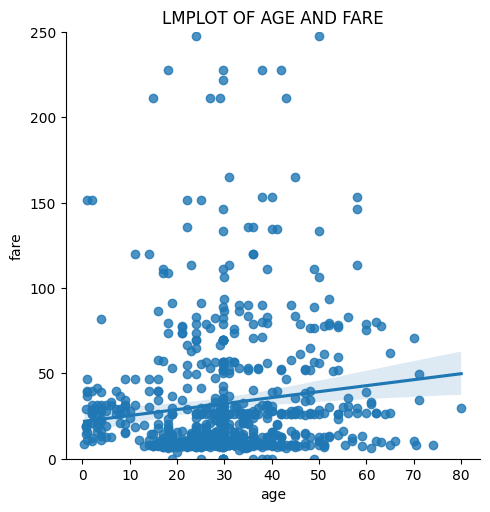

In [53]:
sns.lmplot(x='age',y='fare',data=new_df,)
plt.title('LMPLOT OF AGE AND FARE')
plt.ylim(0,250)
plt.show()

In [54]:
new_df.shape

(891, 2)

In [55]:
X=new_df[['age']]
y=new_df['fare']

In [56]:
print(X.shape)
print(y.shape)

(891, 1)
(891,)


# how machine learning starts
> split data into training and testing sets
> use sklearn and us model for fit and predict
> check accuracy of the model using metrics such as accuracy score, precision, recall, f1 score, and confusion matrix

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [58]:
X_train,x_test,Y_train,y_test=train_test_split(X,y,train_size=0.8)

In [59]:
model.fit(X_train,Y_train)


LinearRegression()

In [64]:
predict_y=model.predict(x_test)

In [81]:
v=model.predict([[80]])
v

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([46.50557299])

In [67]:
#check accuracy
from sklearn.metrics import accuracy_score,mean_absolute_error

In [70]:
mae=mean_absolute_error(y_true=y_test,y_pred=predict_y)
mae

27.519514892852587